In [20]:
shape_cat=""
vol=""
z_range=""

In [21]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "all_z"


In [22]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [23]:
print(len(clusters))
print(len(shapes))

12482
203070


In [24]:
# Print the numbers of galaxies that needed to be masked

assert np.sum(shapes[('All','e1')]==-9999)==0
assert np.sum(shapes[('All','e2')]==-9999)==0
assert np.sum(shapes['All','flags_select'])==0
assert np.sum(shapes[('All','PP')]<=0.55)==0

In [25]:
#masking
print(len(clusters))
print(len(shapes))

12482
203070


# Stats of e1,e2

count    203070.000000
mean         -0.000320
std           0.147964
min          -0.728444
25%          -0.080939
50%          -0.000233
75%           0.080106
max           0.852003
Name: (All, e2), dtype: float64

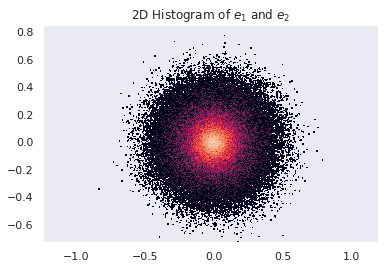

In [26]:
from matplotlib.colors import LogNorm 
plt.hist2d(shapes['All','e1'],shapes['All','e2'],bins=500,norm=LogNorm())
plt.axis('equal')
plt.title("2D Histogram of $e_1$ and $e_2$")
pd.Series(shapes['All','e1']).describe()
pd.Series(shapes['All','e2']).describe()

count    203070.000000
mean          0.668877
std         274.120513
min      -44173.333800
25%          -1.006517
50%           0.000047
75%           0.998770
max       67310.028672
dtype: float64

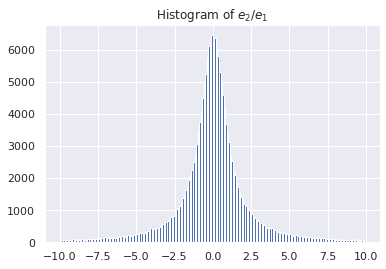

In [27]:
#statistics and hisgoram of e2/e1
plt.hist(shapes['All','e2']/shapes['All','e1'],bins=np.arange(-10,10,0.1))
plt.title("Histogram of $e_2$/$e_1$")
pd.Series(shapes['All','e2']/shapes['All','e1']).describe()

# Get phi 

In [28]:
def get_std_err_of_mean(np_array):
    mean=np_array.mean()
    std=np_array.std()
    n=len(np_array)
    return(std/np.sqrt(n))

In [29]:
phi_1d=shapes[('All','phi')]

## Stats for unweighted

In [30]:
pd.Series(phi_1d).describe()
print("Mean:{:05e} \nStdE:{:05e} ".format(phi_1d.mean(),phi_1d.std()/np.sqrt(len(phi_1d))))

Mean:4.158369e+01 
StdE:6.924412e-02 


In [43]:
def plt_phi(df):
    phi_1d=df[('All','phi')]
    plt.hist(phi_1d,bins=9,weights=df[('All','PP')],histtype="step")
    plt.title("Histogram of $\phi_{sat}$ weighted by probability") 
    pd.Series(phi_1d).describe()

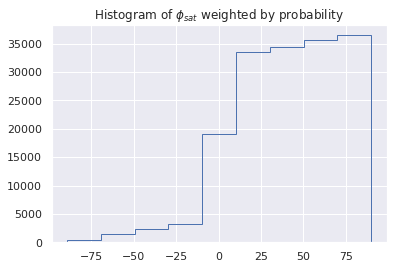

In [44]:
plt_phi(shapes)

# Get e

## Statistics of e1 and e2

In [33]:
e1=shapes[('All','e1')].to_numpy()
shapes[('All','e1')].describe()

count    203070.000000
mean          0.000250
std           0.147185
min          -0.838272
25%          -0.079562
50%          -0.000224
75%           0.080156
max           0.789564
Name: (All, e1), dtype: float64

In [34]:
e2=shapes[('All','e1')].to_numpy()
shapes[('All','e2')].describe()

count    203070.000000
mean         -0.000320
std           0.147964
min          -0.728444
25%          -0.080939
50%          -0.000233
75%           0.080106
max           0.852003
Name: (All, e2), dtype: float64

In [35]:
# np.save("/home/cz136/project/sa/data/{}/e_array".format(dir_string),e_list)

In [36]:
e_p_1d=shapes[('All','ep')]
e_x_1d=shapes[('All','ex')]

mean=1.686992e-05, std_mean=3.277384e-04


count    203070.000000
mean          0.000017
std           0.147690
min          -0.734604
25%          -0.080265
50%           0.000073
75%           0.080347
max           0.853849
Name: (All, ep), dtype: float64

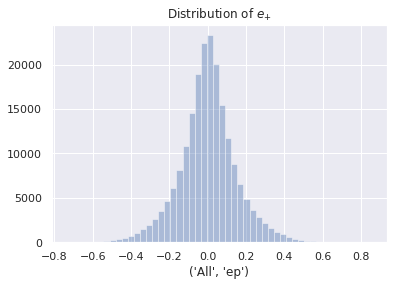

In [37]:
ax=sns.distplot(e_p_1d,kde=False)
ax.set_title("Distribution of $e_{+}$")
print ("mean={:05e}, std_mean={:05e}".format(e_p_1d.mean(),get_std_err_of_mean(e_p_1d)))
pd.Series(e_p_1d).describe()

mean=-9.351165e-05, std_mean=3.272305e-04


count    203070.000000
mean         -0.000094
std           0.147461
min          -0.749489
25%          -0.080539
50%          -0.000511
75%           0.080278
max           0.729156
Name: (All, ex), dtype: float64

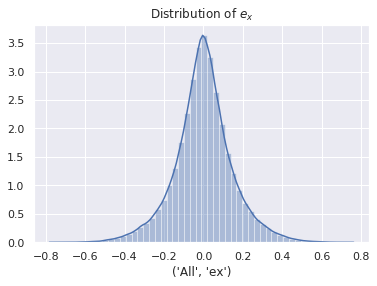

In [38]:
ax=sns.distplot(e_x_1d)
ax.set_title("Distribution of $e_{x}$")
print ("mean={:05e}, std_mean={:05e}".format(e_x_1d.mean(),get_std_err_of_mean(e_x_1d)))
pd.Series(e_x_1d).describe()

In [39]:
def get_R_percent(lower,upper):
    R_lower=shapes[('All','R')].quantile(lower)
    R_upper=shapes[('All','R')].quantile(upper)
    R_selected=shapes[(shapes[('All','R')]>=R_lower)&(shapes[('All','R')]<=R_upper) ]
    return(R_selected)

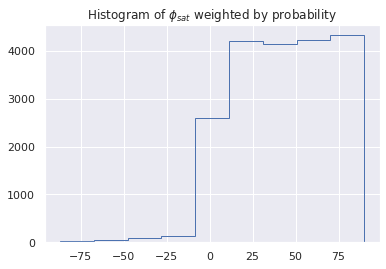

In [42]:
plt_phi(get_R_percent(0,0.1))

(array([4.000e+00, 5.000e+00, 2.700e+01, 6.200e+01, 1.520e+02, 3.540e+02,
        8.080e+02, 1.925e+03, 4.078e+03, 5.553e+03, 4.030e+03, 1.885e+03,
        8.500e+02, 3.260e+02, 1.510e+02, 5.800e+01, 3.100e+01, 2.000e+00,
        3.000e+00, 3.000e+00]),
 array([-0.59355938, -0.53113012, -0.46870085, -0.40627159, -0.34384233,
        -0.28141306, -0.2189838 , -0.15655453, -0.09412527, -0.03169601,
         0.03073326,  0.09316252,  0.15559179,  0.21802105,  0.28045031,
         0.34287958,  0.40530884,  0.46773811,  0.53016737,  0.59259663,
         0.6550259 ]),
 <a list of 20 Patch objects>)

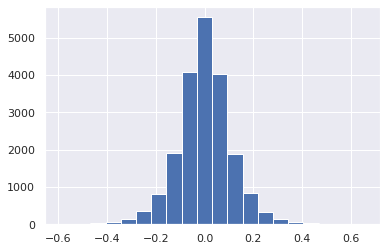

In [41]:
plt.hist(get_R_percent(0,0.1)[('All','ep')],bins=20)

In [17]:
def get_pa_for_member(obj):
    e1=obj['All']['e1']
    e2=obj['All']['e2']
    
    α =0.5*np.arctan2(-e2,-e1)*180/np.pi
    return(α)

In [18]:
test[('All','alpha')]=test.apply(lambda x:get_pa_for_member(x),axis=1)

/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(test[[('All','RA'),('All','DEC'),('All','snr'),('All','alpha')]])

Band               All                                   
Data                RA        DEC          snr      alpha
ID                                                       
3008604143  321.145681  -0.534724  1350.853912  62.807826
3008607641  321.157457  -0.518815  1097.975960  49.650448
3008607702  321.189257  -0.518816  1357.570582  45.369547
3008608302  321.153174  -0.522132  1170.760739  46.267917
3010836383  336.717595  -0.935329  1496.750479  62.132473
3012005397  338.837618  -1.260170  1759.823620 -85.269822
3012009686  338.821303  -1.181638  1041.130831  10.708678
3012009986  338.848488  -1.169953  1175.048640 -49.452290
3012010330  338.727557  -1.179596  2254.526012  88.825538
3012012203  338.795786  -1.128614  1195.594251  74.554235
3012012304  338.856246  -1.127409  1931.299432  20.075716
3012012658  338.747377  -1.133963  3685.397783 -64.495535
3012012964  338.764812  -1.115231  1112.945142   5.891899
3012013749  338.788226  -1.102077  2459.508554 -55.416485
3012014065  338.682752  -1.100761  2529.248770 -48.600853
3012014234  338.798069  -1.093190  2122.332908  60.477527
3012014362  338.690210  -1.082253  3817.982272  58.732129
3013363918  338.899509  -0.991836  2333.532787 -22.389939
3015118277  353.918000   1.126630  1922.075164  15.916653
3015755999  353.940232   0.989553  1892.947502 -36.429479
3015756672  353.857291   1.093558  1085.290081 -75.076835
3015756724  353.835766   1.096089  1856.103069  76.031203
3015764209  353.933512   1.053000  1136.248447 -75.796998
3016683549  355.274250  -0.003673  1408.527641 -88.460310
3016683580  355.300819  -0.004601  1377.939611  22.885466
3016684161  355.277420  -0.001937  1461.634995   5.582559
3016685336  355.298159   0.005217  1322.364060  82.320919
3016845916  353.808664   0.943510  2179.460438 -34.645994
3016848758  353.785677   0.995445  3170.905603 -32.102954
3016850582  353.727484   1.026382  1359.924014  27.481345
3016851065  353.859223   1.024580  2681.779484 -11.843673
3016851250  353.809883   1.044454  1456.362211 -60.179989
3016851582  353.822737   1.072556  1382.542171 -39.881788
3016851683  353.817687   1.059239  1168.663768 -28.763766
3016853032  353.774421   1.056392  1111.033950  44.498416
3016853186  353.866836   1.046753  3428.661898 -71.385670
3018545917  322.516592  -0.352214  1027.603285  85.105560
3018546584  322.516070  -0.359047  1476.666084 -78.027979
3018845122  323.907543  -1.004477  1082.282441 -89.347436
3018848681  323.907835  -0.988566  1276.236474 -17.875149
3027377489   96.105513 -50.566853  1188.940651  56.410185
3028250948   94.788059 -46.683866  1178.033803 -26.476542
3028254190   94.760250 -46.638329  1171.986944  16.052433
3028256792   94.809377 -46.614478  1774.915460  11.921127
3028258343   94.824535 -46.562023  2452.599563 -70.998964
3028258384   94.838731 -46.560676  1111.293787  -6.872049
3028258661   94.766012 -46.562200  1605.036181  88.015880
3028259286   94.773776 -46.546690  1250.174731 -88.431793
3028276291   94.576635 -46.270448  1158.452768  -4.363303
3028863031   94.463541 -44.645464  1034.760357  55.224178
3029234537   94.513015 -46.243014  1030.761316  -9.344793
3029235293   94.523500 -46.231937  2068.215311  77.551995
3029235670   94.517962 -46.216703  1293.281381  31.304182
3029235768   94.517905 -46.243212  1692.862695  24.113154
3029329709   93.845392 -42.573027  1017.836438 -20.015259
3029330755   93.850669 -42.556561  1080.294030 -60.796065
3029815458   93.469425 -44.477267  2697.656024 -77.186388
3029815884   93.430794 -44.471260  2956.969291 -43.192951
3029816067   93.479497 -44.466991  1064.635729  87.390360
3029818095   93.496089 -44.458215  2229.674003 -58.335616
3029818128   93.495219 -44.450378  1725.300183 -20.808090
3029819649   93.486187 -44.443940  1538.261278  19.117952
3029819837   93.511948 -44.436377  1195.922255 -44.376941
3029819941   93.486109 -44.450223  3568.575631  64.451520
3029821978   93.488948 -44.442939  2909.221648  51.679611
3029825428   93.505862 -44.399599  2227.330463  68.47283